## Elbow Method is used on the clustering to identify the number of clusters

In [1]:
from google.colab import files
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
mall_cust_df = pd.read_csv(filename)

In [4]:
mall_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall_cust_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
mall_cust_df.shape

(200, 5)

In [9]:
mall_cust_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Mall Customer Segmentation Data

**Content**

You are owning a supermarket mall and through membership cards, you have some basic data about your customers like customer 10, age, gender, annual income and spending score. Spending score is something you assisgn to the customer based on your defined

In [11]:
X = mall_cust_df[["Annual Income (k$)", "Spending Score (1-100)"]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [14]:
y_pred = kmean.fit_predict(X)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [16]:
mall_cust_df['Cluster'] = y_pred

In [17]:
mall_cust_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [18]:
kmean.cluster_centers_

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

### To find out number of clusters of the dataset

Sum of squared distance

In [25]:
sum_of_squared_distance = []

In [26]:
for k in range(1, 10):
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  sum_of_squared_distance.append(km.inertia_)

In [27]:
sum_of_squared_distance

[269981.28000000014,
 184102.1534926472,
 106348.37306211119,
 73679.78903948837,
 44454.47647967972,
 38858.959975143895,
 33859.371012691,
 26127.94644929538,
 22784.6284479181]

Plot sum_of_squared_distance & determine optimal k using Elbow method

Text(0.5, 0, 'Sum of Squared Distances')

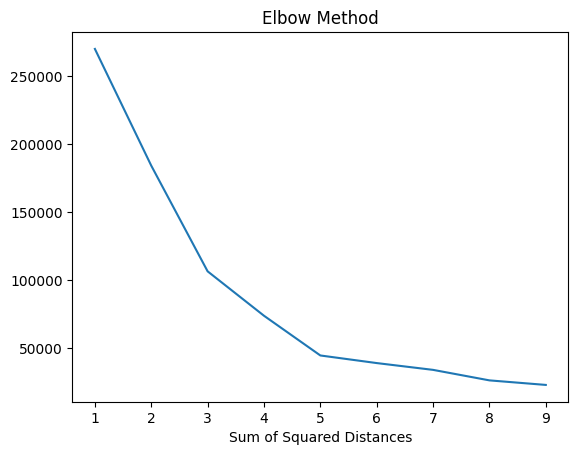

In [30]:
plt.plot(range(1, 10), sum_of_squared_distance)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.xlabel("Sum of Squared Distances")

### Doing the same above operations on income dataset

In [31]:
uploaded2 = files.upload()
filename2 = next(iter(uploaded2))

Saving income.csv to income.csv


In [36]:
income_df = pd.read_csv(filename2)

In [37]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [38]:
income_df

,Name,Age,Income
0,Diya Nayak,27,70000
1,Shravan Omayya,29,90000
2,Shivam Pandey,29,61000
3,Bhakti Paradkar,28,60000
4,Omkar Pashte,42,150000
5,Akshata Patil,39,155000
6,Shubham Pawar,41,160000
7,Sumit Phadke,38,162000
8,Niraj Phafat,36,156000
9,Siddhant Puthran,35,130000


In [39]:
income_df.shape

(22, 3)

In [40]:
income_df.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [41]:
X2 = income_df[["Age", "Income"]].values
X2

array([[    27,  70000],
       [    29,  90000],
       [    29,  61000],
       [    28,  60000],
       [    42, 150000],
       [    39, 155000],
       [    41, 160000],
       [    38, 162000],
       [    36, 156000],
       [    35, 130000],
       [    37, 137000],
       [    26,  45000],
       [    27,  48000],
       [    28,  51000],
       [    29,  49500],
       [    32,  53000],
       [    40,  65000],
       [    41,  63000],
       [    43,  64000],
       [    39,  80000],
       [    41,  82000],
       [    39,  58000]])

In [42]:
kmean2 = KMeans(n_clusters=3)
kmean2

KMeans(n_clusters=3)

In [45]:
y_pred2 = kmean2.fit_predict(X2)

In [46]:
y_pred2

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [47]:
income_df['Cluster'] = y_pred2

In [48]:
income_df

,Name,Age,Income,Cluster
0,Diya Nayak,27,70000,1
1,Shravan Omayya,29,90000,1
2,Shivam Pandey,29,61000,1
3,Bhakti Paradkar,28,60000,1
4,Omkar Pashte,42,150000,2
5,Akshata Patil,39,155000,2
6,Shubham Pawar,41,160000,2
7,Sumit Phadke,38,162000,2
8,Niraj Phafat,36,156000,2
9,Siddhant Puthran,35,130000,0


In [49]:
kmean2.cluster_centers_

array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

### To find out number of clusters of the dataset

Sum of squared distance

In [54]:
sum_of_squared_distance2 = []

In [55]:
for k in range(1, 10):
  km2 = KMeans(n_clusters=k)
  km2 = km2.fit(X)
  sum_of_squared_distance2.append(km2.inertia_)

In [56]:
sum_of_squared_distance2

[269981.28000000014,
 186206.76002258612,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 37239.83554245604,
 33642.57922077922,
 27364.578829676087,
 21838.863692828916]

Plot sum_of_squared_distance & determine optimal k using Elbow method

Text(0.5, 0, 'Sum of Squared Distances')

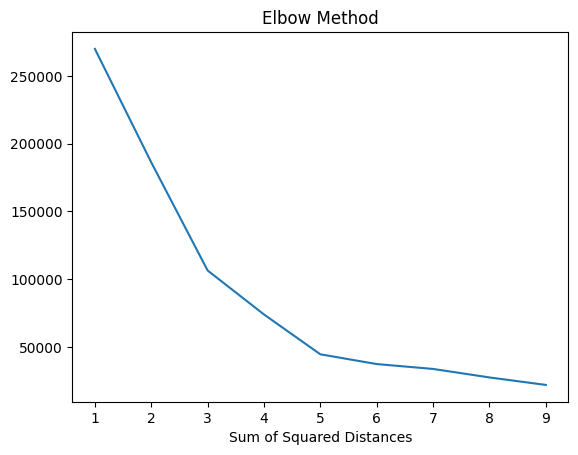

In [57]:
plt.plot(range(1, 10), sum_of_squared_distance2)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.xlabel("Sum of Squared Distances")